In [260]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler

# Importing Heart Dataset


In [261]:
heart = pd.read_csv('/content/heart_disease_missing (1) (1).csv')
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


In [262]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.349112,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.602117,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,0.858554,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,1.949795,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.078759,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,2.970842,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.277466,1.000000


In [263]:
heart['thal'] = heart.thal.round(0)

In [264]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0


#CM5 Cleaning the dataset

For the numerical features of the dataset we have decided to fill the missing values with the mean of that particular column.

In [265]:
no_zeros = ['trestbps', 'chol', 'oldpeak', 'thalach']
for column in no_zeros:
    mean = int(heart[column].mean(skipna=True))
    heart[column] = heart[column].replace(np.NaN, mean)

For the features which are not numerical we filled the missing values with its own frequent values occuring in that column.

In [266]:
heart = heart.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [267]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# CM1

In [268]:
heart[heart.columns[:]].corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.140074,-0.084230,0.331658,0.182401,0.050823,-0.126079,-0.378662,0.114545,0.132230,-0.109214,0.266278,0.049211,-0.196967
sex,-0.140074,1.000000,-0.057939,-0.049192,-0.190650,0.081750,-0.044643,0.017224,0.122773,0.097203,-0.060134,0.120466,0.215171,-0.249428
cp,-0.084230,-0.057939,1.000000,-0.006780,-0.060037,0.057205,0.035974,0.243749,-0.349369,-0.182464,0.155173,-0.180350,-0.164629,0.490819
trestbps,0.331658,-0.049192,-0.006780,1.000000,0.157087,0.133590,-0.111503,-0.098125,0.086803,0.161440,-0.130404,0.079756,0.036511,-0.115553
chol,0.182401,-0.190650,-0.060037,0.157087,1.000000,-0.025398,-0.084644,-0.056064,0.064030,0.048593,0.023602,0.037260,-0.015071,-0.076160
fbs,0.050823,0.081750,0.057205,0.133590,-0.025398,1.000000,-0.104312,0.037098,0.098474,-0.092217,-0.022832,0.128097,0.026077,-0.005276
restecg,-0.126079,-0.044643,0.035974,-0.111503,-0.084644,-0.104312,1.000000,0.035211,-0.049757,-0.075841,0.072221,-0.081040,-0.042585,0.095500
thalach,-0.378662,0.017224,0.243749,-0.098125,-0.056064,0.037098,0.035211,1.000000,-0.357161,-0.344809,0.439127,-0.176630,-0.148644,0.411448
exang,0.114545,0.122773,-0.349369,0.086803,0.064030,0.098474,-0.049757,-0.357161,1.000000,0.279166,-0.308743,0.101805,0.206719,-0.450321
oldpeak,0.132230,0.097203,-0.182464,0.161440,0.048593,-0.092217,-0.075841,-0.344809,0.279166,1.000000,-0.608689,0.190294,0.220378,-0.444088


**CM1:** After exploring various subsets of features and looking at their coorelation the subset of features we have picked are: 'sex', 'thalach', 'exang', 'oldpeak' and 'ca'. 'target' is also included for setting it as a hue to get better idea about the features. We have chosen this subset of features because this subset comprises of only numerical, ordinal and binary features and we would get better understandings of relationships while looking at the pairsplot.

In [269]:
subset=heart[['sex', 'thalach', 'exang', 'oldpeak', 'ca', 'target']]
subset.sample(5)

,sex,thalach,exang,oldpeak,ca,target
65,1,144.917383,0,4.150481,0,1
172,1,165.940312,0,0.461065,0,0
188,1,107.974829,1,1.562676,3,0
134,0,142.917643,1,0.048828,0,0
114,1,129.735437,1,1.592099,0,0


# CM1 PairPlot

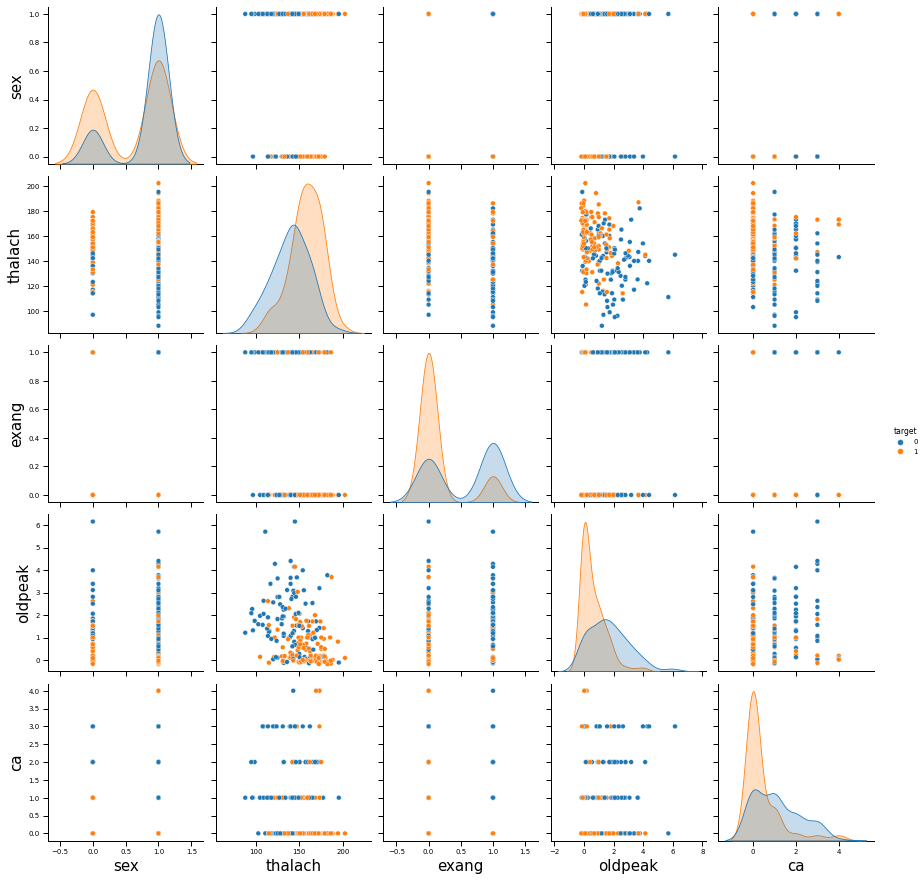

In [270]:
sns.pairplot(subset, hue='target')

Looking at the pair-plot we can see that for 'ca' vs. 'sex' it could be assumed that mostly when 'ca' = 2&3 both sexes are less targeted whereas for 'ca' = 0 both sexes are more targeted. And when ca is 2 and 3 people are generally less targeted. With 'exang'= 0 more people are targeted than 'exang' = 1. With 'oldpeak' between -1 to 3 more people are targeted. Since we cannot get a clear idea of the dataset we decided on plotting the bar plot for understanding this dataset a bit more.

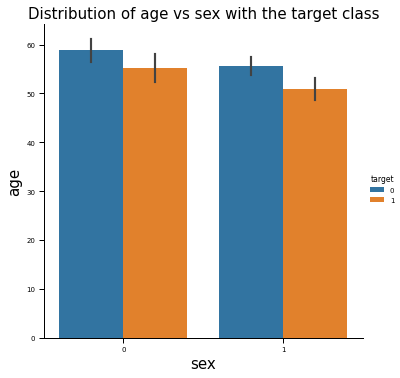

In [271]:
#Barplot of Age vs. Sex
sns.catplot(kind = 'bar', data = heart, x = 'sex', y = 'age', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

Looking at the above plot we can see that females who are suffering from the heart disease are older than male.

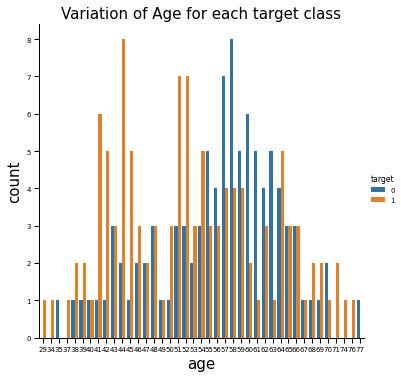

In [272]:
sns.set_context("paper", font_scale = 0.8, rc = {"font.size": 15,"axes.titlesize": 15,"axes.labelsize": 15})
sns.catplot(kind = 'count', data =heart, x = 'age', hue = 'target', order = heart['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

Looking at the above plot we can infer that most people who are suffering from the heart disease are of the age of 44 followed by 51 and 52.

# CM2 

**CM2:** Correlation between the subset of features.

In [273]:
subset[subset.columns[:]].corr()

,sex,thalach,exang,oldpeak,ca,target
sex,1.000000,0.017224,0.122773,0.097203,0.120466,-0.249428
thalach,0.017224,1.000000,-0.357161,-0.344809,-0.176630,0.411448
exang,0.122773,-0.357161,1.000000,0.279166,0.101805,-0.450321
oldpeak,0.097203,-0.344809,0.279166,1.000000,0.190294,-0.444088
ca,0.120466,-0.176630,0.101805,0.190294,1.000000,-0.338780
target,-0.249428,0.411448,-0.450321,-0.444088,-0.338780,1.000000


Looking at the above correlation coefficient we can see that there is no strong correlation between the features and the target. None of the coefficients are equal to or exceed the -0.5 and +0.5.Therefore we can not find any significant positive or negative correlation between the features. Hence we do not observe any significant pattern from the pair plots itself.

# CM2: Mean, Variance, Skew, Kurtosis

In [274]:
subset.mean()

sex          0.688679
thalach    149.635752
exang        0.344340
oldpeak      1.106704
ca           0.731132
target       0.542453
dtype: float64

In [275]:
subset.var()

sex          0.215416
thalach    478.127629
exang        0.226840
oldpeak      1.488286
ca           1.079026
target       0.249374
dtype: float64

The variance of the subset of features are generally low except 'thalach'. Low variance indicates that the feature has narrower range of observations and they lie nearby the mean of the feature. Whereas higher variance indicates that the feature has wider range of observations and they lie further from the mean value.

In [276]:
subset.skew()

sex       -0.820789
thalach   -0.396114
exang      0.659880
oldpeak    1.274676
ca         1.377751
target    -0.171644
dtype: float64

The features 'sex', 'thalach' and 'target' are negatively skewed meaning the tail is to the left. Whereas 'exang', 'oldpeak' and 'ca' are positively skewed meaning tail of the distribution is to the right and as values of 'oldpeak' and 'ca' are more than 1 they are highly skewed.

In [277]:
subset.kurt()

sex       -1.339028
thalach   -0.161165
exang     -1.579550
oldpeak    1.646459
ca         1.020304
target    -1.989397
dtype: float64

The features 'sex', 'thalach', 'exang' and 'target' shows negative kurtosis i.e. they are Platykurtic. The features 'oldpeak' and 'ca' shows positive kurtosis hence they are Leptokurtic and they are more peaked compared to other features of the subset.

#CM4 Histogram

In [278]:
bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

**Histograms of Numerical features**

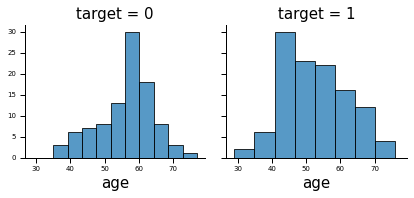

In [279]:
#Histogram of Age
hist1 = sns.FacetGrid(heart, col="target")
hist1.map(sns.histplot, "age")

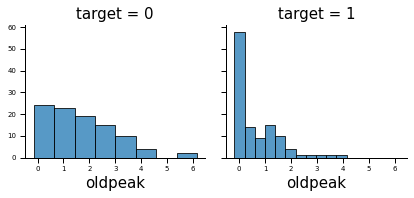

In [280]:
#Histogram of oldpeak
hist2 = sns.FacetGrid(heart, col="target")
hist2.map(sns.histplot, "oldpeak")

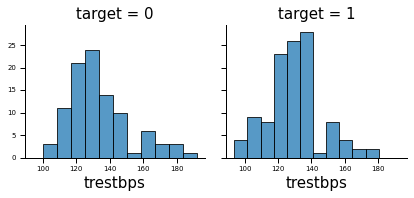

In [281]:
#Histogram of trestbps
hist3 = sns.FacetGrid(heart, col="target")
hist3.map(sns.histplot, "trestbps")

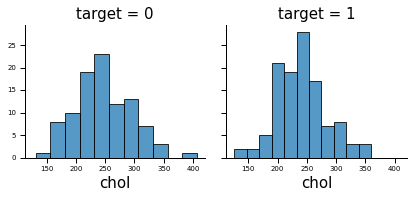

In [282]:
#Histogram of chol
hist4 = sns.FacetGrid(heart, col="target")
hist4.map(sns.histplot, "chol")

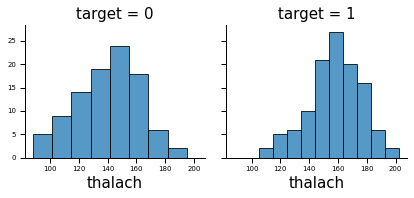

In [283]:
#Histogram of thalach
hist5 = sns.FacetGrid(heart, col="target")
hist5.map(sns.histplot, "thalach")

**Histograms of binary features**

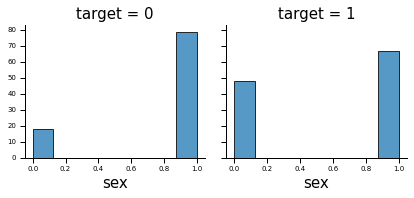

In [284]:
#Histogram of sex
hist6 = sns.FacetGrid(heart, col="target")
hist6.map(sns.histplot, "sex")

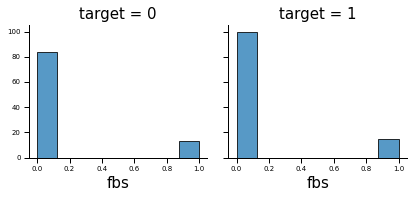

In [285]:
#Histogram of fbs
hist7 = sns.FacetGrid(heart, col="target")
hist7.map(sns.histplot, "fbs")

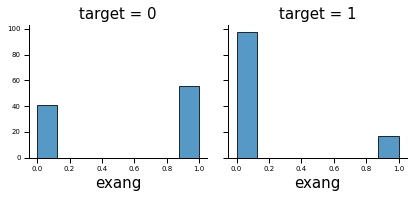

In [286]:
#Histogram of exang
hist8 = sns.FacetGrid(heart, col="target")
hist8.map(sns.histplot, "exang")

**Histograms of Categorical Features**

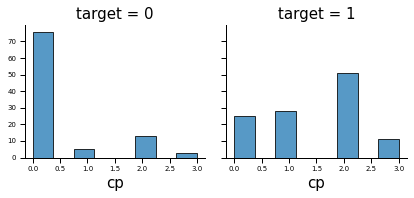

In [287]:
#Histogram of cp
hist9 = sns.FacetGrid(heart, col="target")
hist9.map(sns.histplot, "cp")

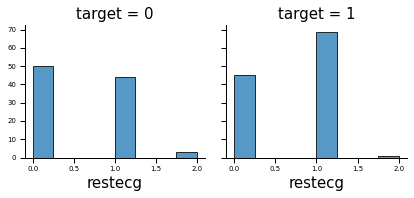

In [288]:
#Histogram of restecg
hist10 = sns.FacetGrid(heart, col="target")
hist10.map(sns.histplot, "restecg")

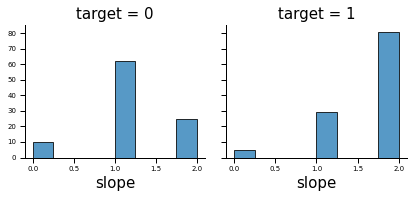

In [289]:
#Histogram of slope
hist11 = sns.FacetGrid(heart, col="target")
hist11.map(sns.histplot, "slope")

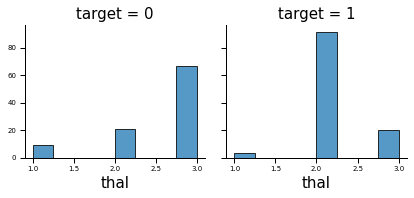

In [290]:
#Histogram of thal
hist12 = sns.FacetGrid(heart, col="target")
hist12.map(sns.histplot, "thal")

**Histograms of Ordinal Feature**

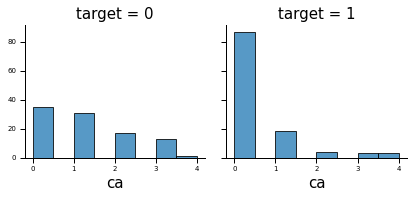

In [291]:
#Histogram of ca
hist13 = sns.FacetGrid(heart, col="target")
hist13.map(sns.histplot, "ca")

#CM3 Outliers

For looking at the outliers lets look at the box plot of various features of our subset.

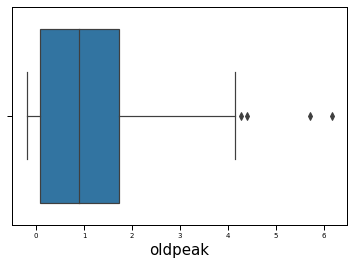

In [292]:

sns.boxplot(x=heart['oldpeak'])


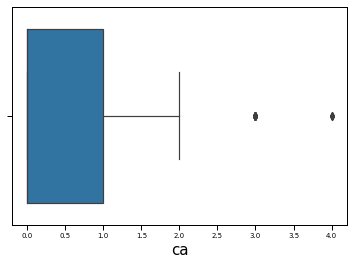

In [293]:
sns.boxplot(x=heart['ca'])

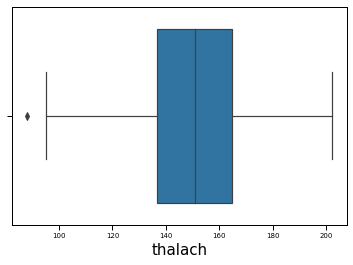

In [294]:
sns.boxplot(x=heart['thalach'])

As we can see from the above boxplots there aren't that many outliers compared to the number of observations and can be ignored for the course of this analysis

# KNN


For performing the classification of data using KNN classifier, rather than picking the whole dataset we are going to select the following features which shows relatablly high coefficient correlation with the 'target' feature. It will help us get more accurate classifier.

In [295]:
df1 = heart[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]


In [296]:
#Dividing the df1 dataset into x and y 
x = df1.iloc[:, 0:-1].values
y = df1.iloc[:, -1].values

In [297]:
#Dividing x and y in to train, validation and test sets
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size = 0.2, random_state = 275)

In [298]:
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size = 0.2, random_state = 275)

# CM6 The best K

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

Text(0, 0.5, 'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

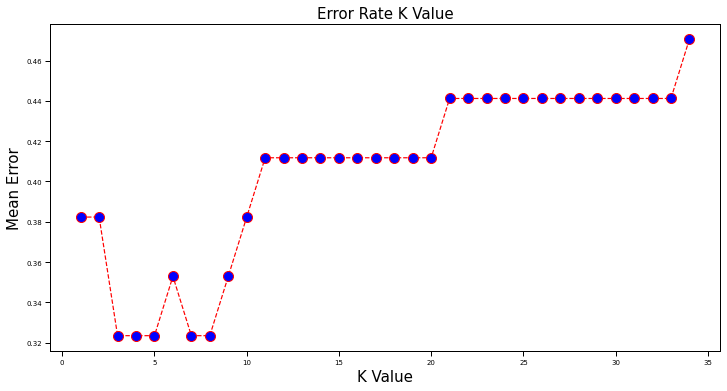

In [299]:
# Plotting K Value and Mean error
error = []

# Calculating error for K values between 1 and 35
for i in range(1, 35):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_val)
    error.append(np.mean(pred_i != y_val))
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 35), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

[0.6176470588235294]
[0.6176470588235294, 0.6764705882352942]
[0.6176470588235294, 0.6764705882352942, 0.6176470588235294]
[0.6176470588235294, 0.6764705882352942, 0.6176470588235294, 0.5882352941176471]
[0.6176470588235294, 0.6764705882352942, 0.6176470588235294, 0.5882352941176471, 0.5882352941176471]
[0.6176470588235294, 0.6764705882352942, 0.6176470588235294, 0.5882352941176471, 0.5882352941176471, 0.5588235294117647]
[0.6176470588235294, 0.6764705882352942, 0.6176470588235294, 0.5882352941176471, 0.5882352941176471, 0.5588235294117647, 0.5588235294117647]


Text(0, 0.5, 'Accuracy of Sample Model')

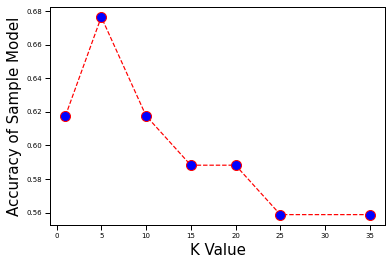

In [300]:
# In order to find best K value for Sample model
from sklearn import metrics
# try K=1 through K=35 and record testing accuracy
k_range = [1,5,10,15,20,25,35]
# We can create Python dictionary using [] or dict()
scores = []
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=2)
# p=1 manhattan_distance, p=2 eulicdean_distance
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_val)
  scores.append(metrics.accuracy_score(y_val, y_pred))
  print(scores)
plt.plot(k_range, scores, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy of Sample Model')


From the above plot best k is when the value of Mean Error is minimum. In our case it is when k= 3, 4, 5, 7, 8. Let's pick **k=5**

# CM7

In [301]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2, weights='uniform')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [302]:
y_pred = classifier.predict(x_val)

In [303]:
accuracy_score(y_val, y_pred)

0.6764705882352942

In [304]:
y_pred = classifier.predict(x_test)

In [305]:
#Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[15  1]
 [ 5 22]]


In [306]:
#Accuracy
accuracy_score(y_test, y_pred)

0.8604651162790697

In [307]:
#AUC 
from sklearn.metrics import roc_auc_score
y_probas = classifier.predict_proba(x_test)
probs = y_probas[:, 1]
roc_auc_score(y_test, probs)

0.9108796296296297

In [308]:
#f-score
f1_score(y_test, y_pred)

0.8800000000000001

# CM7 Improved Model

In [309]:
#Standard Scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_val = sc_x.fit_transform(x_val)
x_test = sc_x.transform(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

Text(0, 0.5, 'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

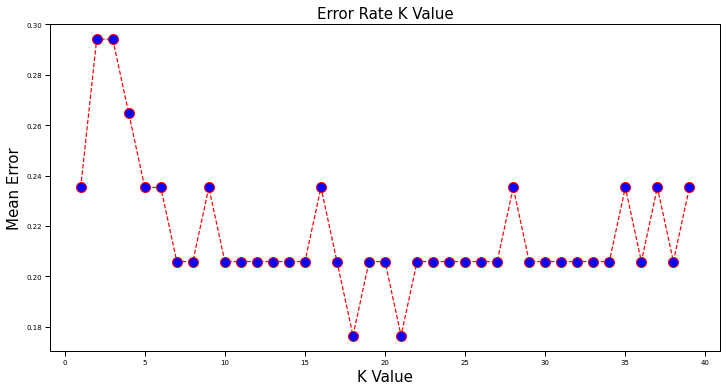

In [310]:
#Finding the best K 
error = []

# Calculating error for K values between 1 and 35
for i in range(1, 40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_val)
    error.append(np.mean(pred_i != y_val))
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Looking at the above plot **k=17** is the best k observed. Now lets do the weighted KNN. After many trial and tests below are the best found parameters.

In [311]:
classifier = KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean', p =1, weights='uniform', leaf_size = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=1,
                     weights='uniform')

In [312]:
y_pred = classifier.predict(x_test)

In [313]:
#Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[13  3]
 [ 1 26]]


In [314]:
#Accuracy
accuracy_score(y_test, y_pred)

0.9069767441860465

In [315]:
#f-score
f1_score(y_test, y_pred)

0.9285714285714286

In [316]:
#AUC Score
y_probas = classifier.predict_proba(x_test)
probs = y_probas[:, 1]
roc_auc_score(y_test, probs)

0.8738425925925926